単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

In [1]:
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.font_manager as fm

# 日本語フォントの設定
jp_font_path = '/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc'  # macOSの場合の日本語フォントパス
jp_font = fm.FontProperties(fname=jp_font_path)

In [2]:
def count_word_frequencies():
    word_counter = Counter()

    with open('neko.txt.mecab', 'r', encoding='utf-8') as infile:
        for line in infile:
            if line == 'EOS\n':
                continue
            
            surface, attr = line.split('\t')
            attr = attr.split(',')
            word_counter[surface] += 1

    return word_counter

def plot_log_log(word_counter):
    # 単語の出現頻度を高い順にソート
    frequencies = sorted(word_counter.values(), reverse=True)
    
    # 順位（ランク）を作成
    ranks = range(1, len(frequencies) + 1)
    
    # 両対数グラフを作成
    plt.figure(figsize=(10, 6))
    plt.plot(ranks, frequencies, marker='o', linestyle='none', markersize=5)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('出現頻度順位', fontproperties=jp_font)
    plt.ylabel('出現頻度', fontproperties=jp_font)
    plt.title('単語の出現頻度順位と出現頻度の両対数グラフ', fontproperties=jp_font)
    plt.grid(True, which="both", ls="--")
    plt.show()



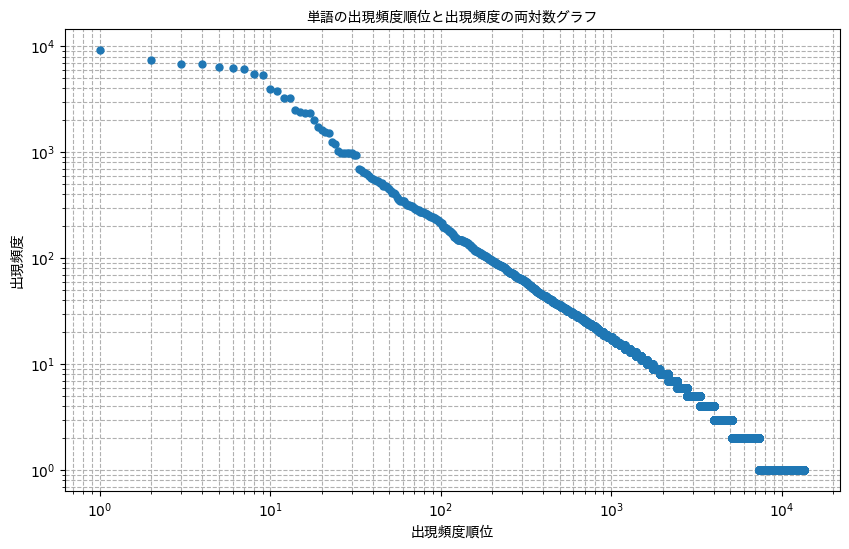

In [3]:
if __name__ == '__main__':
    word_counter = count_word_frequencies()
    plot_log_log(word_counter)